In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

In [2]:
sdf = src.read_csv('../Data/results/toy_star_2D.csv')
sdf.params={'mass':2.0/100}
sdf

,x,y,vx,vy,u,h,rho
0,0.080367,0.595546,-0.001426,0.006700,0.000000e+00,0.190040,0.797450
1,0.490517,0.343132,-0.000039,-0.000297,-1.048118e-08,0.187356,0.820456
2,0.400744,0.422407,0.002250,0.002763,0.000000e+00,0.178608,0.902797
3,0.356403,0.268055,0.000757,0.005688,2.828498e-03,0.143034,1.407721
4,-0.401891,0.272128,-0.001175,0.002089,-5.988508e-03,0.149594,1.286958
...,...,...,...,...,...,...,...
95,0.100865,-0.088363,0.002940,0.004833,1.362864e-03,0.115475,2.159832
96,-0.126752,0.226275,0.004181,-0.011056,1.573176e-03,0.121561,1.948949
97,-0.522093,0.284147,-0.001857,0.000643,-3.479183e-03,0.185733,0.834861
98,0.240169,-0.171190,0.000522,0.003096,-3.272877e-04,0.124322,1.863360


<Axes: xlabel='x', ylabel='y'>

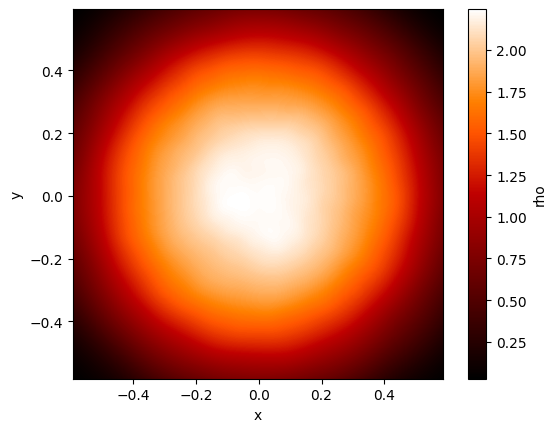

In [3]:
sdf.render('rho', xsec=1.0)

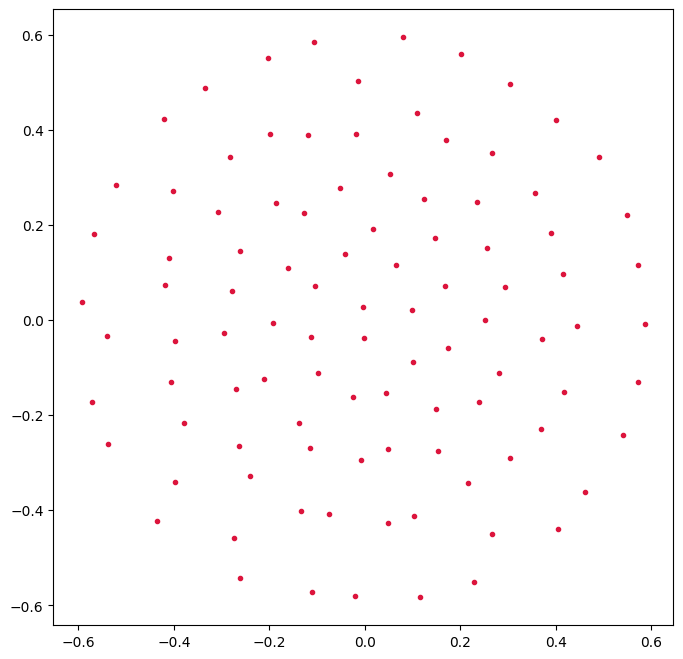

In [4]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
plt.show()

In [5]:
def density_theo(r, R, lmbda, k):
    return lmbda/(4*k)*(R**2-r**2)

In [6]:
R = 0.75
k = 0.1
M = 2.0
n = 1.0
lmbda = 2*k / (np.pi**(1/n)) * (M*(1+n)/R**2)**(1+1/n)/M

In [7]:
r = np.linspace(0.001, 1.1*R, 100)
dens = density_theo(r, R, lmbda, k)

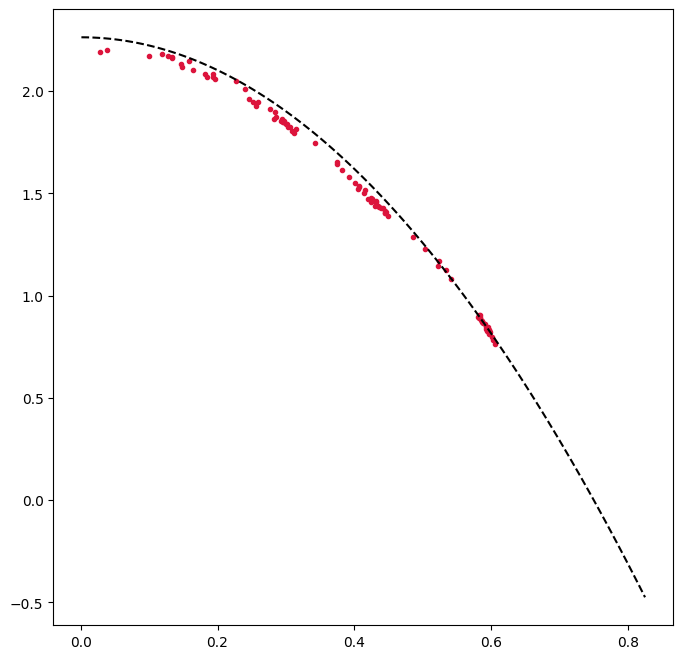

In [8]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.sqrt(sdf['x']**2+sdf['y']**2), sdf['rho'], '.', color='crimson')
plt.plot(r, dens, '--', color='k')
plt.show()